In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv("50_Startups.csv")

In [3]:
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [5]:
#Null Values
data.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [6]:
#Duplicates
data.duplicated().sum()

0

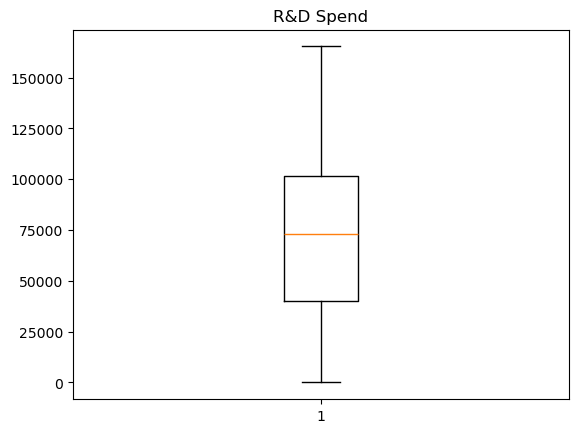

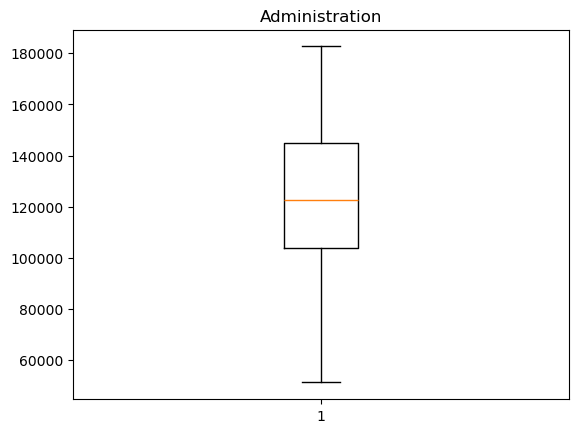

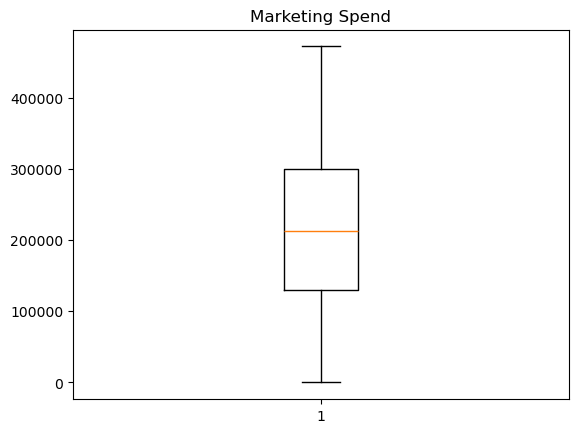

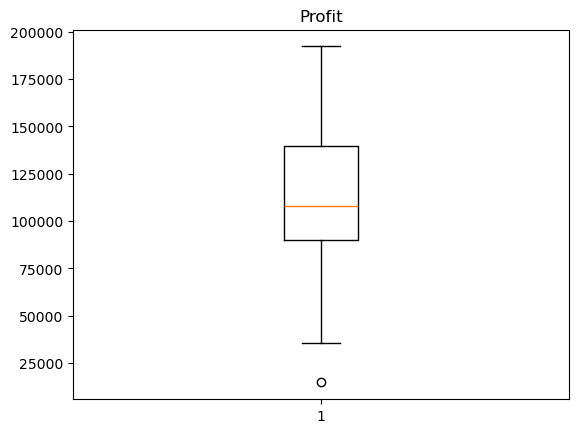

In [7]:
#Outliers
for col in data.columns:
    if data[col].dtype!="object":
        plt.boxplot(data[col])
        plt.title(col)
        plt.show()

In [8]:
out_cols=['Profit']

In [9]:
for col in out_cols:
    Q1=data[col].quantile(0.25)
    Q3=data[col].quantile(0.75)
    IQR=Q3-Q1
    UL=Q3+1.5*IQR
    LL=Q1-1.5*IQR
    data=data[(data[col]>=LL)&(data[col]<=UL)]

In [10]:
data

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [11]:
#label Encoding
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [12]:
for col in data.columns:
    if data[col].dtype=="object":
        data[col]=le.fit_transform(data[col])
        print(le.classes_)

['California' 'Florida' 'New York']


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49 entries, 0 to 48
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        49 non-null     float64
 1   Administration   49 non-null     float64
 2   Marketing Spend  49 non-null     float64
 3   State            49 non-null     int32  
 4   Profit           49 non-null     float64
dtypes: float64(4), int32(1)
memory usage: 2.1 KB


In [14]:
#Feature Selection
data.corr()

,R&D Spend,Administration,Marketing Spend,State,Profit
R&D Spend,1.000000,0.243438,0.711654,0.067359,0.978437
Administration,0.243438,1.000000,-0.037280,0.008080,0.205841
Marketing Spend,0.711654,-0.037280,1.000000,0.045313,0.739307
State,0.067359,0.008080,0.045313,1.000000,0.044876
Profit,0.978437,0.205841,0.739307,0.044876,1.000000


<Axes: >

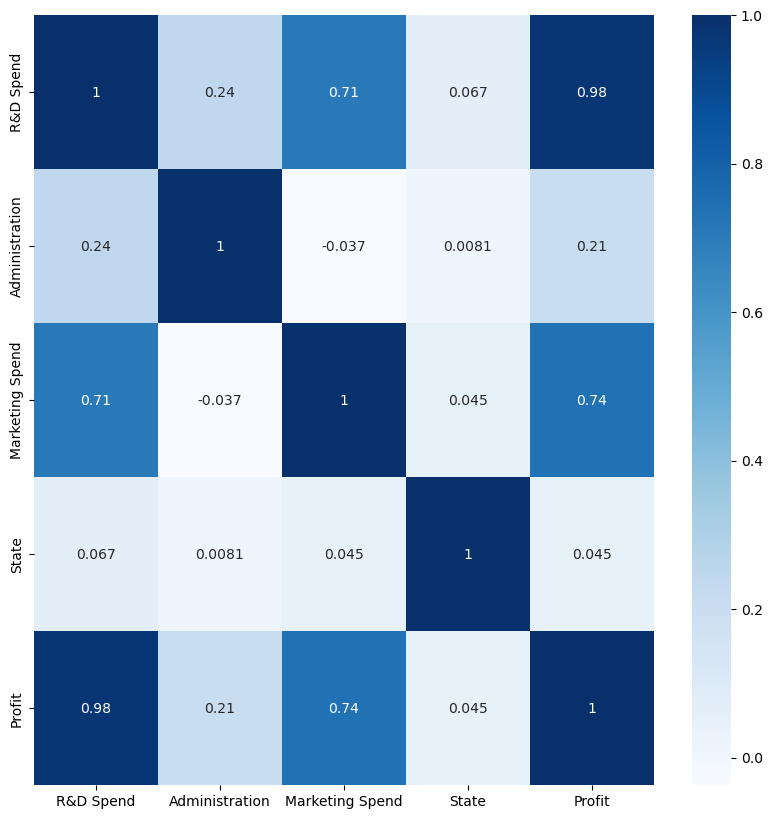

In [15]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(),annot=True,cmap="Blues")

In [16]:
#VIF-Variance Inflation Factor
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [17]:
x=data.drop(["Profit"],axis=1)

In [18]:
x

,R&D Spend,Administration,Marketing Spend,State
0,165349.20,136897.80,471784.10,2
1,162597.70,151377.59,443898.53,0
2,153441.51,101145.55,407934.54,1
3,144372.41,118671.85,383199.62,2
4,142107.34,91391.77,366168.42,1
5,131876.90,99814.71,362861.36,2
6,134615.46,147198.87,127716.82,0
7,130298.13,145530.06,323876.68,1
8,120542.52,148718.95,311613.29,2
9,123334.88,108679.17,304981.62,0


In [19]:
y=data["Profit"]
y

0     192261.83
1     191792.06
2     191050.39
3     182901.99
4     166187.94
5     156991.12
6     156122.51
7     155752.60
8     152211.77
9     149759.96
10    146121.95
11    144259.40
12    141585.52
13    134307.35
14    132602.65
15    129917.04
16    126992.93
17    125370.37
18    124266.90
19    122776.86
20    118474.03
21    111313.02
22    110352.25
23    108733.99
24    108552.04
25    107404.34
26    105733.54
27    105008.31
28    103282.38
29    101004.64
30     99937.59
31     97483.56
32     97427.84
33     96778.92
34     96712.80
35     96479.51
36     90708.19
37     89949.14
38     81229.06
39     81005.76
40     78239.91
41     77798.83
42     71498.49
43     69758.98
44     65200.33
45     64926.08
46     49490.75
47     42559.73
48     35673.41
Name: Profit, dtype: float64

In [20]:
vif_data=pd.DataFrame()
vif_data["features"]=x.columns
vif_data["Muticolinearity_value"]=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif_data

,features,Muticolinearity_value
0,R&D Spend,8.602594
1,Administration,5.131815
2,Marketing Spend,7.673058
3,State,2.423590


In [21]:
data.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit'], dtype='object')

In [22]:
x.drop(['R&D Spend'],axis=1,inplace=True)

In [23]:
vif_data=pd.DataFrame()
vif_data["features"]=x.columns
vif_data["Muticolinearity_value"]=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif_data

,features,Muticolinearity_value
0,Administration,4.427310
1,Marketing Spend,3.600998
2,State,2.423488


In [24]:
#Splitting the data into train and test

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=42)

In [27]:
x_train

,Administration,Marketing Spend,State
6,147198.87,127716.82,0
40,118546.05,172795.67,0
41,84710.77,164470.71,1
46,115816.21,297114.46,1
15,122616.84,261776.23,2
9,108679.17,304981.62,0
16,121597.55,264346.06,0
24,99281.34,140574.81,2
33,103057.49,214634.81,1
30,115641.28,91131.24,1


In [28]:
y_train

6     156122.51
40     78239.91
41     77798.83
46     49490.75
15    129917.04
9     149759.96
16    126992.93
24    108552.04
33     96778.92
30     99937.59
0     192261.83
43     69758.98
32     97427.84
5     156991.12
29    101004.64
11    144259.40
36     90708.19
1     191792.06
21    111313.02
2     191050.39
37     89949.14
35     96479.51
23    108733.99
39     81005.76
10    146121.95
22    110352.25
18    124266.90
48     35673.41
20    118474.03
7     155752.60
42     71498.49
14    132602.65
28    103282.38
38     81229.06
Name: Profit, dtype: float64

In [29]:
x_test

,Administration,Marketing Spend,State
13,135495.07,252664.93,0
45,124153.04,1903.93,2
47,135426.92,0.00,0
44,154806.14,28334.72,0
17,145077.58,282574.31,2
27,127864.55,353183.81,2
26,144135.98,134050.07,1
25,139553.16,137962.62,0
31,152701.92,88218.23,2
19,153514.11,0.00,2


In [30]:
y_test

13    134307.35
45     64926.08
47     42559.73
44     65200.33
17    125370.37
27    105008.31
26    105733.54
25    107404.34
31     97483.56
19    122776.86
12    141585.52
4     166187.94
34     96712.80
8     152211.77
3     182901.99
Name: Profit, dtype: float64

In [31]:
from sklearn.linear_model import LinearRegression

In [32]:
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [33]:
y_pred=model.predict(x_test)
y_pred

array([130899.30128483,  61235.67301618,  72039.58004361,  85377.85802727,
       133870.76597329, 144326.23347814, 102620.715578  , 105600.93817137,
        91264.44219605,  71004.26792435, 123735.0787647 , 138327.48268221,
       128870.90103983, 141899.32527818, 148118.49649213])

In [34]:
print(len(y_test))
print(len(y_pred))

15
15


In [35]:
from sklearn.metrics import *
r2_score(y_test,y_pred)

0.5661681584666379

In [71]:
data.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit'], dtype='object')

<Axes: xlabel='R&D Spend', ylabel='Profit'>

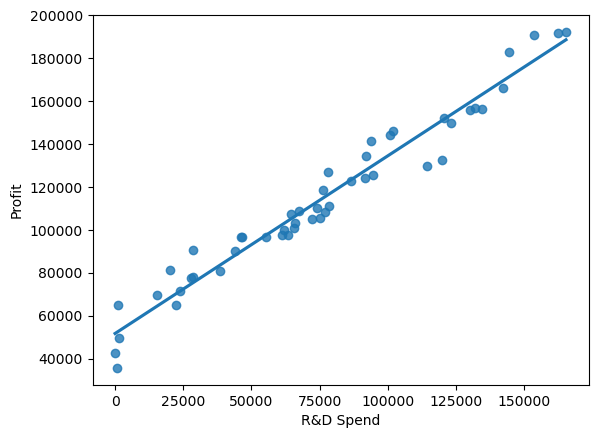

In [75]:
sns.regplot(x='R&D Spend',y="Profit",data=data,ci=0)

<Axes: xlabel='Administration', ylabel='Profit'>

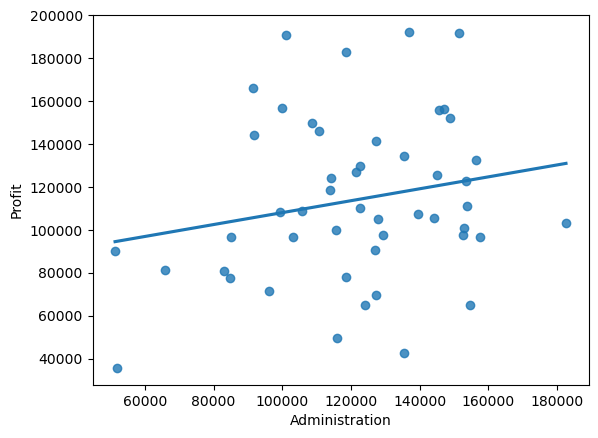

In [79]:
sns.regplot(x='Administration',y="Profit",data=data,ci=0)

<Axes: xlabel='Marketing Spend', ylabel='Profit'>

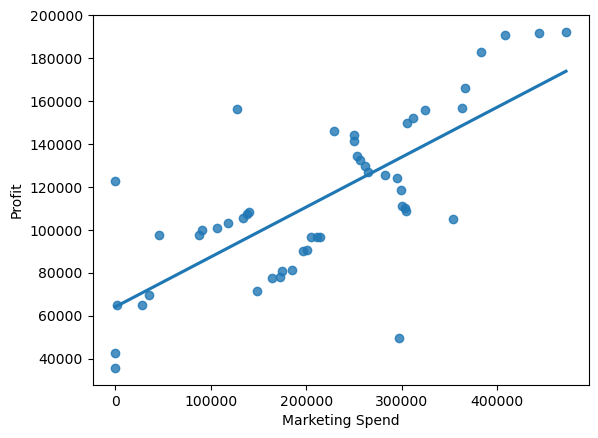

In [83]:
sns.regplot(x='Marketing Spend',y="Profit",data=data,ci=0)

<Axes: xlabel='State', ylabel='Profit'>

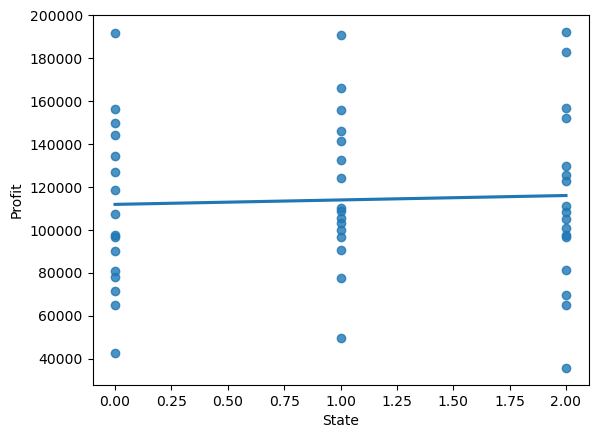

In [85]:
sns.regplot(x='State',y="Profit",data=data,ci=0)

In [87]:
data.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit'], dtype='object')